Topics:
Topic 1: 19, covid, test, children, masks, michigan, virus, health, order, says
Topic 2: covid, 19, people, president, face, pandemic, shows, masks, wearing, trump
Topic 3: coronavirus, novel, president, trump, says, people, video, times, donald, facebook
Topic 4: 19, covid, coronavirus, cases, states, new, masks, united, says, pandemic
Topic 5: covid, 19, flu, deaths, people, china, wuhan, lab, masks, cdc


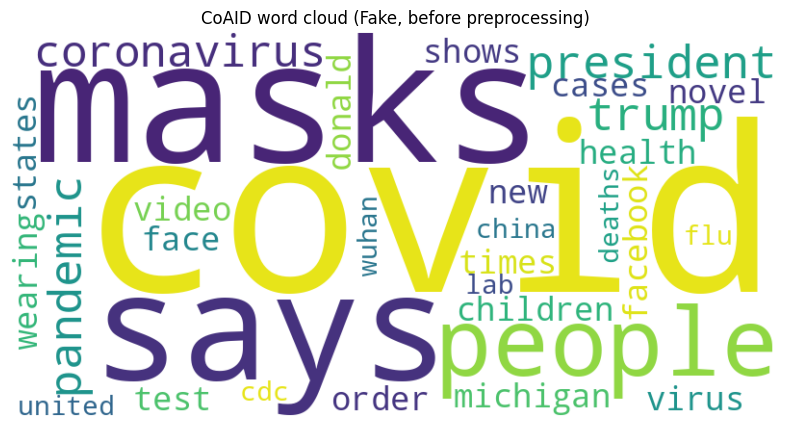

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords', quiet=True)

# Load datasets
files = ['NewsFakeCOVID-19_11-01-2020.csv', 'NewsFakeCOVID-19_09-01-2020.csv',
         'NewsFakeCOVID-19_05-01-2020.csv', 'NewsFakeCOVID-19_07-01-2020.csv']

dataframes = [pd.read_csv(file) for file in files]
data = pd.concat(dataframes)

# Preprocess text in 'Title' column (lowercase and remove NaN)
data['title'] = data['title'].fillna('').str.lower()

# Remove stopwords and tokenize text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = text.split()
    return ' '.join([word for word in tokens if word not in stop_words])

data['cleaned_title'] = data['title'].apply(preprocess_text)

# Vectorize the 'cleaned_title' column using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dt_matrix = vectorizer.fit_transform(data['cleaned_title'])

# Perform LDA topic modeling (5 topics)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dt_matrix)

# Get feature names (words)
terms = vectorizer.get_feature_names_out()

# Function to print and return topics with top words
def print_topics(model, terms, n_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_words = [terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")
        topics.append(top_words)
    return topics

# Print topics and get top words for each topic
print("Topics:")
topics = print_topics(lda, terms)

# Generate a single word cloud for all topics combined
all_top_words = [word for topic in topics for word in topic]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_top_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('CoAID word cloud (Fake, before preprocessing)')
plt.show()

Topics:
Topic 1: covid, 19, coronavirus, disease, guidance, healthcare, vaccine, interim, 2019, spread
Topic 2: coronavirus, masks, home, face, fda, flu, states, new, health, mask
Topic 3: covid, 19, risk, patients, know, symptoms, cases, help, severe, deaths
Topic 4: covid, 19, sars, coronavirus, cov, test, new, infection, virus, study
Topic 5: covid, 19, pandemic, health, children, commentary, experts, kids, americans, adults


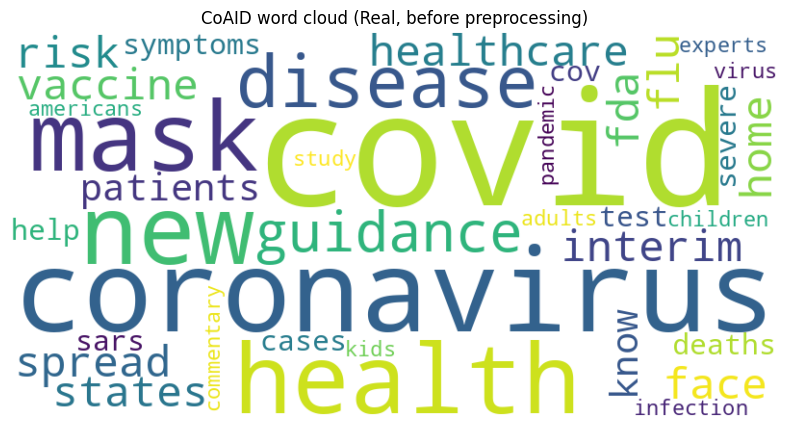

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords', quiet=True)

# Load datasets
files = ['NewsRealCOVID-19_11-01-2020.csv', 'NewsRealCOVID-19_09-01-2020.csv',
         'NewsRealCOVID-19_05-01-2020.csv', 'NewsRealCOVID-19_07-01-2020.csv']

dataframes = [pd.read_csv(file) for file in files]
data = pd.concat(dataframes)

# Preprocess text in 'Title' column (lowercase and remove NaN)
data['title'] = data['title'].fillna('').str.lower()

# Remove stopwords and tokenize text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = text.split()
    return ' '.join([word for word in tokens if word not in stop_words])

data['cleaned_title'] = data['title'].apply(preprocess_text)

# Vectorize the 'cleaned_title' column using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dt_matrix = vectorizer.fit_transform(data['cleaned_title'])

# Perform LDA topic modeling (5 topics)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dt_matrix)

# Get feature names (words)
terms = vectorizer.get_feature_names_out()

# Function to print and return topics with top words
def print_topics(model, terms, n_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_words = [terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")
        topics.append(top_words)
    return topics

# Print topics and get top words for each topic
print("Topics:")
topics = print_topics(lda, terms)

# Generate a single word cloud for all topics combined
all_top_words = [word for topic in topics for word in topic]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_top_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('CoAID word cloud (Real, before preprocessing)')
plt.show()

Topics:
Topic 1: covid, coronavirus, masks, times, facebook, claim, shared, posts, thousands, pandemic
Topic 2: coronavirus, new, covid, people, novel, virus, vaccine, york, deaths, world
Topic 3: covid, flu, positive, trump, deaths, president, states, children, pandemic, people
Topic 4: coronavirus, trump, china, president, covid, video, vaccine, outbreak, shows, people
Topic 5: dr, fauci, mask, house, anthony, face, social, nancy, pelosi, home


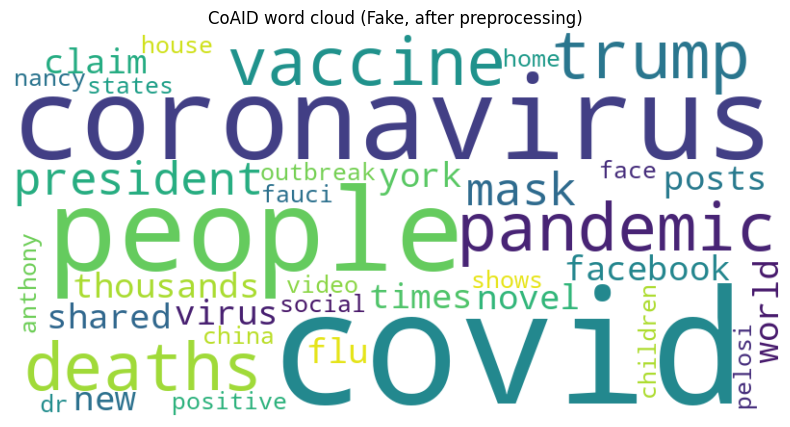

In [69]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords if not already present
nltk.download('stopwords', quiet=True)

# Additional filler words to ignore
additional_fillers = {'says', 'percent', 'like', 'um', 'uh', 'you know', 'actually', 'basically', 'literally'}

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers and punctuation
    text = re.sub(r'[\W\d]+', ' ', text)

    # Get English stopwords and combine with additional fillers
    stop_words = set(stopwords.words('english')).union(additional_fillers)

    # Tokenize the text
    words = text.split()

    # Remove stopwords and filler words
    filtered_words = [word for word in words if word not in stop_words]

    # Join the words back into a string
    processed_text = ' '.join(filtered_words)

    return processed_text

# Load datasets
files = ['NewsFakeCOVID-19_11-01-2020.csv', 'NewsFakeCOVID-19_09-01-2020.csv', 'NewsFakeCOVID-19_05-01-2020.csv', 'NewsFakeCOVID-19_07-01-2020.csv']
dataframes = [pd.read_csv(file) for file in files]
data = pd.concat(dataframes)

# Preprocess text in 'Title' column
data['processed_title'] = data['title'].fillna('').apply(preprocess_text)

# Vectorize the processed titles
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dt_matrix = vectorizer.fit_transform(data['processed_title'])

# Perform LDA topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dt_matrix)

# Get feature names (words)
terms = vectorizer.get_feature_names_out()

# Function to print and return topics with top words
def print_topics(model, terms, n_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_words = [terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")
        topics.append(top_words)
    return topics

# Print topics and get top words for each topic
print("Topics:")
topics = print_topics(lda, terms)

# Combine all top words from all topics
all_top_words = [word for topic in topics for word in topic]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_top_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('CoAID word cloud (Fake, after preprocessing)')
plt.show()

Topics:
Topic 1: covid, coronavirus, pandemic, symptoms, vaccine, clinic, flu, help, testing, children
Topic 2: covid, sars, cov, need, virus, know, commentary, care, information, pandemic
Topic 3: covid, cases, patients, people, deaths, study, blood, nursing, death, masks
Topic 4: covid, vaccine, risk, test, severe, study, new, tests, trump, shows
Topic 5: covid, coronavirus, health, new, states, healthcare, guidance, disease, public, interim


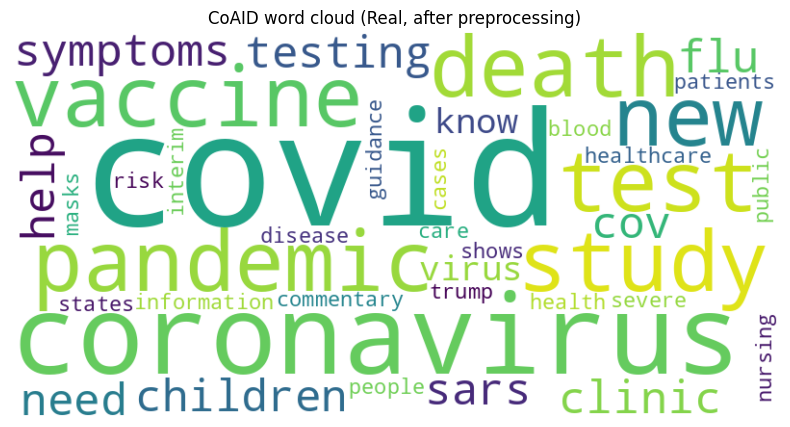

In [70]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords if not already present
nltk.download('stopwords', quiet=True)

# Additional filler words to ignore
additional_fillers = {'says', 'percent', 'like', 'um', 'uh', 'you know', 'actually', 'basically', 'literally'}

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers and punctuation
    text = re.sub(r'[\W\d]+', ' ', text)

    # Get English stopwords and combine with additional fillers
    stop_words = set(stopwords.words('english')).union(additional_fillers)

    # Tokenize the text
    words = text.split()

    # Remove stopwords and filler words
    filtered_words = [word for word in words if word not in stop_words]

    # Join the words back into a string
    processed_text = ' '.join(filtered_words)

    return processed_text

# Load datasets
files = ['NewsRealCOVID-19_11-01-2020.csv', 'NewsRealCOVID-19_09-01-2020.csv', 'NewsRealCOVID-19_05-01-2020.csv', 'NewsRealCOVID-19_07-01-2020.csv']
dataframes = [pd.read_csv(file) for file in files]
data = pd.concat(dataframes)

# Preprocess text in 'Title' column
data['processed_title'] = data['title'].fillna('').apply(preprocess_text)

# Vectorize the processed titles
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dt_matrix = vectorizer.fit_transform(data['processed_title'])

# Perform LDA topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dt_matrix)

# Get feature names (words)
terms = vectorizer.get_feature_names_out()

# Function to print and return topics with top words
def print_topics(model, terms, n_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_words = [terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")
        topics.append(top_words)
    return topics

# Print topics and get top words for each topic
print("Topics:")
topics = print_topics(lda, terms)

# Combine all top words from all topics
all_top_words = [word for topic in topics for word in topic]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_top_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('CoAID word cloud (Real, after preprocessing)')
plt.show()

Topics for 'False' and 'Pants on fire' statements:
Topic 1: says, people, security, state, texas
Topic 2: says, state, budget, obama, years
Topic 3: says, president, obama, barack, campaign
Topic 4: says, tax, scott, state, taxes
Topic 5: health, care, percent, states, tax

Topics for other statements:
Topic 1: says, obama, clinton, voted, president
Topic 2: percent, jobs, 000, years, says
Topic 3: says, state, president, trump, obama
Topic 4: states, percent, people, texas, oil
Topic 5: health, says, care, 000, federal


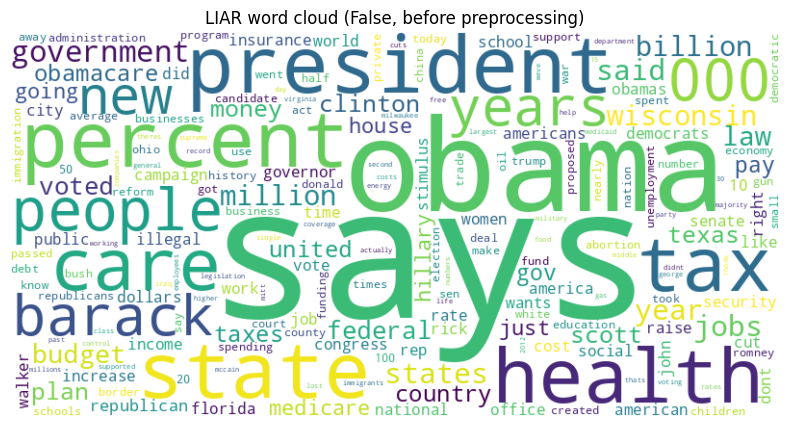

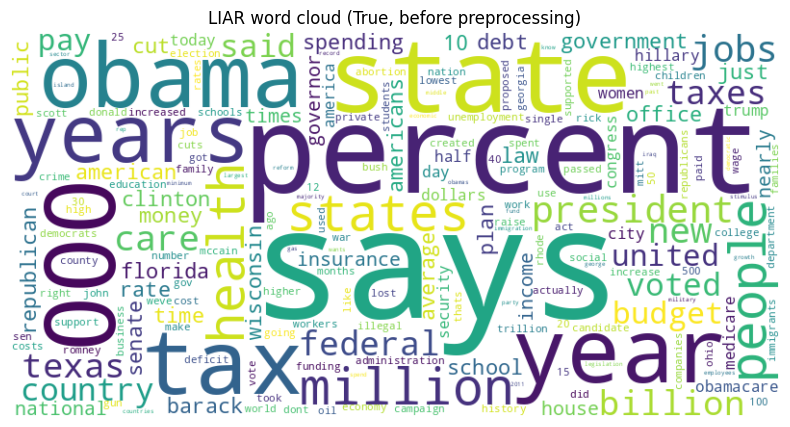

In [71]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the datasets
df1 = pd.read_csv('test-extended - test.csv')
df2 = pd.read_csv('train-extended - train.csv')

# Combine datasets
df_combined = pd.concat([df1, df2], ignore_index=True)

# Function for topic modeling
def perform_topic_modeling(data, n_topics=5, n_top_words=5):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data['Statement'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    words = vectorizer.get_feature_names_out()
    topics = []
    for topic in lda.components_:
        topic_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(topic_words)

    return topics, vectorizer, X

# Topic modeling for "False" and "Pants on fire" statements
false_pants = df_combined[df_combined['Label'].isin(['FALSE', 'pants-fire'])]
if not false_pants.empty:
    topics_false, vectorizer_false, X_false = perform_topic_modeling(false_pants)
    print("Topics for 'False' and 'Pants on fire' statements:")
    for i, topic in enumerate(topics_false, 1):
        print(f"Topic {i}: {', '.join(topic)}")
else:
    print("No 'False' or 'Pants on fire' statements found for topic modeling.")

# Topic modeling for other statements
other_statements = df_combined[~df_combined['Label'].isin(['FALSE', 'pants-fire'])]
topics_other, vectorizer_other, X_other = perform_topic_modeling(other_statements)
print("\nTopics for other statements:")
for i, topic in enumerate(topics_other, 1):
    print(f"Topic {i}: {', '.join(topic)}")

# Function to generate word cloud
def generate_wordcloud(X, vectorizer, title):
    words = vectorizer.get_feature_names_out()
    word_freq = dict(zip(words, X.sum(axis=0).tolist()[0]))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for "False" and "Pants on fire" statements
if not false_pants.empty:
    generate_wordcloud(X_false, vectorizer_false, 'LIAR word cloud (False, before preprocessing)')

# Generate word cloud for other statements
generate_wordcloud(X_other, vectorizer_other, 'LIAR word cloud (True, before preprocessing)')

Topics for 'False' and 'Pants on fire' statements:
Topic 1: obama, people, texas, president, rick
Topic 2: obama, president, barack, tax, states
Topic 3: state, people, obama, jobs, work
Topic 4: tax, clinton, hillary, jobs, wisconsin
Topic 5: health, care, state, insurance, medicare

Topics for other statements:
Topic 1: health, million, care, year, americans
Topic 2: tax, taxes, security, social, cut
Topic 3: state, new, jobs, republican, budget
Topic 4: states, rate, united, obama, president
Topic 5: obama, clinton, state, hillary, trump


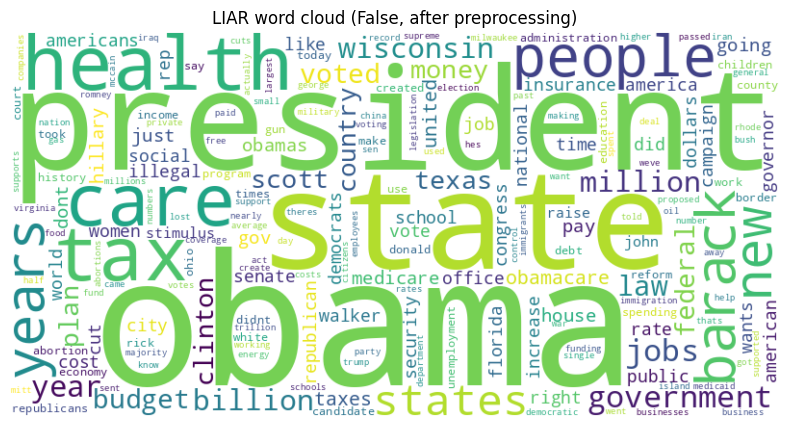

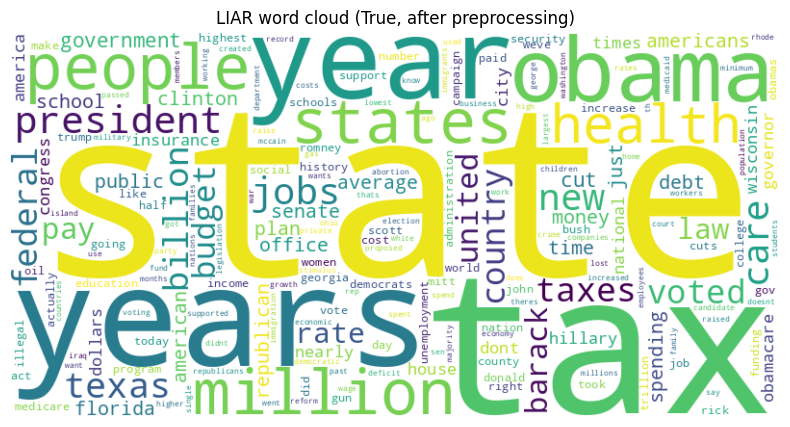

In [72]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the datasets
df1 = pd.read_csv('test-extended - test.csv')
df2 = pd.read_csv('train-extended - train.csv')

# Combine datasets
df_combined = pd.concat([df1, df2], ignore_index=True)

# Define additional words to remove
additional_stop_words = set(['says', '000', 'percent', 'said', 'would', 'could', 'should', 'may', 'might', 'must', 'will'])

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove additional stop words
    words = text.split()
    words = [word for word in words if word not in additional_stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'Statement' column
df_combined['Processed_Statement'] = df_combined['Statement'].apply(preprocess_text)

# Function for topic modeling
def perform_topic_modeling(data, n_topics=5, n_top_words=5):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data['Processed_Statement'])
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    words = vectorizer.get_feature_names_out()
    topics = []
    for topic in lda.components_:
        topic_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(topic_words)

    return topics, vectorizer, X

# Topic modeling for "False" and "Pants on fire" statements
false_pants = df_combined[df_combined['Label'].isin(['FALSE', 'pants-fire'])]
if not false_pants.empty:
    topics_false, vectorizer_false, X_false = perform_topic_modeling(false_pants)
    print("Topics for 'False' and 'Pants on fire' statements:")
    for i, topic in enumerate(topics_false, 1):
        print(f"Topic {i}: {', '.join(topic)}")
else:
    print("No 'False' or 'Pants on fire' statements found for topic modeling.")

# Topic modeling for other statements
other_statements = df_combined[~df_combined['Label'].isin(['FALSE', 'pants-fire'])]
topics_other, vectorizer_other, X_other = perform_topic_modeling(other_statements)
print("\nTopics for other statements:")
for i, topic in enumerate(topics_other, 1):
    print(f"Topic {i}: {', '.join(topic)}")

# Function to generate word cloud
def generate_wordcloud(X, vectorizer, title):
    words = vectorizer.get_feature_names_out()
    word_freq = dict(zip(words, X.sum(axis=0).tolist()[0]))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for "False" and "Pants on fire" statements
if not false_pants.empty:
    generate_wordcloud(X_false, vectorizer_false, 'LIAR word cloud (False, after preprocessing)')

# Generate word cloud for other statements
generate_wordcloud(X_other, vectorizer_other, 'LIAR word cloud (True, after preprocessing)')